# DESAFIO - Aula_17: Regressão Logística

Base de Dados <br>
Link: https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv <br>
Resumo: O conjunto de dados está relacionado a campanhas de marketing direto (chamadas telefônicas) de uma instituição bancária portuguesa. A variável resposta (y) é binária e indica se o cliente subscreveu um depósito a prazo (1-Sim, 0-Não). <br>
Objetivo: Ajustar um modelo de regressão logística, em uma base de treinamento, para a resposta binária, fazer a previsão desta resposta e avaliar a qualidade de ajuste do modelo em uma base de teste.


## Importando os Dados

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


In [ ]:
data = pd.read_csv('__________/banking.csv',header=0)
#drop na
data = data.dropna()
lista = ('age','education','contact','month','day_of_week','duration',
        'campaign','pdays','previous','emp_var_rate','cons_price_idx','cons_conf_idx', 
        'euribor3m','nr_employed')
#exclui algumas variáveis da análise
for col in lista:
    data.drop(col, axis=1, inplace=True)
    
print(data.shape)

O conjunto de dados fornece a informação dos clientes do banco. Inclui ________ registros e __________ variáveis.

In [ ]:
data.head()

# Parte_1: Tratando os dados

- ## Var resposta

Transformando a variável Income-Renda em 0's and 1's

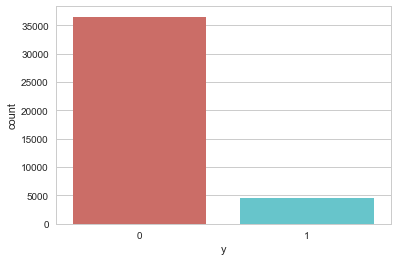

In [6]:
# grafico de barras para a variável dependente
sns.countplot(x='y',data=data, palette='hls')
plt.show()

A proporção de 1's é de aproximandamente 14%

- ## Verificando valores missing

In [ ]:
# verificando quantidade de missing para cada var
data.___________.sum()

Não há dados missing na base de análise

- ## job: trabalho do cliente

Tem muitas linhas missing, então vamos colocá-las em uma nova classe, substituindo por 0 e ver como fica o gráfico

In [ ]:
# grafico de barras para a variável customer job 
sns.countplot(y='job',data=data)
plt.show()
#há muitas categorias: vamos agrupar as classes que tem menos obs

In [ ]:
# unindo as categorias de trabalho, para depois não criar muitas dummys
def agrupa(job):
    if job in ['blue-collar']:
        return 'blue_collar'
    elif job in ['technician']:
        return 'technician'
    elif job in ['admin.']:
        return 'admin' 
    elif job in ['management']:
        return 'management'
    elif job in ['services']:
        return 'services'
    
    else: 
        return 'other'    

In [ ]:
data['job'] = data['job'].apply(agrupa)

In [ ]:
# grafico de barras para a variável customer job 
sns.___________(y='job',data=data)
plt.show()

- ## Marital: estado civil

In [ ]:
sns.countplot(x='marital',data=data)
plt.show()

A categoria unknown tem poucas obs - vamos juntá-la com a cat divorced

In [ ]:
def agrupa1(marital):
    if marital in ['unknown']:
        return 'divorced'
    else: 
        return marital   

In [ ]:
data['marital'] = data['marital'].apply(agrupa1)

In [ ]:
sns.countplot(x='marital',data=data)
plt.show()

- ## Default - crédito em default

In [ ]:
sns.countplot(x='default',data=data)
plt.show()

A categoria yes tem poucas obs - vamos juntá-la com a cat unknown

In [ ]:
def agrupa2(default):
    if default in ['yes']:
        return 'unknown'
    else: 
        return default   

In [ ]:
data['default'] = data['default'].apply(agrupa2)

In [ ]:
sns.countplot(x='default',data=data)
plt.show()

- ## housing: emprestimo imobiliario

In [ ]:
sns.countplot(x='housing',data=data)
plt.show()

Está tudo OK

- ## loan: emprestimo pessoal

In [ ]:
sns.countplot(x='loan',data=data)
plt.show()

Está tudo OK

- ## poutcome: resultado da campanha de marketing anterior

In [ ]:
sns.countplot(x='poutcome',data=data)
plt.show()

Está tudo OK

- ## Criando Dummys

Crie variáveis dummy, que são variáveis com apenas dois valores, zero e um. <br>
Nos modelos de regressão logística, a codificação de todas as variáveis independentes-categoricas como variáveis dummy permite uma fácil interpretação e cálculo da odds ratios e aumenta a estabilidade e a importância dos coeficientes.

In [ ]:
data.dtypes

In [ ]:
#list of columns with dtype: object
#axes[1] coluna
#axes[0] linha
categorical_features = data.select_dtypes(include=['_________']).axes[1] # retorna as vars que são do tipo objeto

# unique: retorna os valores únicos
# nunique: retorna o número de valores únicos
for col in categorical_features:
    print (col, data[col].nunique()) # retorna as vars que são do tipo objeto e a quantidade de categorias em cada uma delas

In [ ]:
#criando dummys para as variáveis categoricas
for col in categorical_features:
    data = pd.concat([data, pd.______________(data[col], prefix=col, prefix_sep='_')], axis=1)
    data.drop(col, axis=1, inplace=True)

In [ ]:
data.columns

In [ ]:
data.head()

# Parte_2: Correlação

- ## Correlação entre as variáveis input

In [ ]:
data1 = data.drop('y', axis=1)
sns.heatmap(data1.corr())
plt.show()

As variáveis input não aparentam alta correlação, desta maneira podemos seguir com todas as variáveis para a análise

## Parte_3: Dividindo a base em train e test

In [ ]:
X = data.iloc[:,1:]
y = data.iloc[:,0]
X_train, X_test, y_train, y_test = ________________(X, y, test_size=______, random_state=_______)

In [ ]:
print(X_train.shape, X_test.shape)

## Parte_4: Metodo de seleção de variáveis forward

In [ ]:
#Metodo de seleção de variáveis forward usando statsmodels
import statsmodels.formula.api as smf
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [ ]:
#junta as bases para utilizar dentro da função forward_selected
X1 = pd.concat([X_train,y_train], axis=1)
X1.rename(columns={'y':'Income'}, inplace=True)
X1.head()

In [ ]:
#colocar para rodar quando for sair para o almoço
#aplicando o método de seleção de variáveis forward

model = ___________________(X1, 'Income')
print(model.model.formula)
print(model.rsquared_adj)


## Parte_5: Ajustando um modelo de Regressão Logística usando statsmodels

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm
import pylab as pl



In [ ]:
# Modelo com todas as variáveis usando o pacote statsmodel
#iv = ['job_admin', 'job_blue_collar', 'job_management', 'job_other',
#       'job_services', 'job_technician', 'marital_divorced', 'marital_married',
#       'marital_single', 'default_no', 'default_unknown', 'housing_no',
#       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
#       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']

iv2 = ['poutcome_success' , 'default_no' , 'job_other' , 'poutcome_failure' , 'marital_single' , 'job_blue_collar' ,
       'job_services' , 'job_technician' , 'marital_divorced']

logReg = sm.____________(y_train, X_train[iv2])

answer = logReg.fit()
answer.summary2()

In [ ]:
# Calculando o valor predito das bases de treinamento e validação
#Base Treinamento
p_train = answer.predict(X_train[iv2])

fpr1, tpr1, __________ =roc_curve(y_train, p_train)
roc_auc1 = auc(____, ____)
print("Area under the ROC curve Tain : %f" % roc_auc1)

#Base Teste
p_test = answer.predict(X_test[iv2])

fpr2, ____, thresholds =roc_curve(y_test, p_test)
roc_auc2 = auc(fpr2, tpr2)
print("Area under the ROC curve Tain : %f" % roc_auc2)

In [ ]:
# plotando a curva ROC para as bases de treinamento e validação
plt.plot(fpr1, tpr1)
plt.plot(fpr2, tpr2)
plt.plot()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(["Train: " + str(roc_auc1), "Test: " + str(roc_auc2)  ],  loc="lower right")
plt.show()

## Parte_6: Ajustar, Prever e Validar um modelo de Regressão Logística usando sklearn

In [ ]:
X1_train = X_train[['poutcome_success' , 'default_no' , 'job_other' , 'poutcome_failure' , 'marital_single' , 'job_blue_collar' ,
       'job_services' , 'job_technician' , 'marital_divorced']]
X1_test = X_test[['poutcome_success' , 'default_no' , 'job_other' , 'poutcome_failure' , 'marital_single' , 'job_blue_collar' ,
       'job_services' , 'job_technician' , 'marital_divorced']]

model = LogisticRegression()
a = model.fit(X1_train, y_train)

model.fit(X1_train, y_train)
p_train1 = model.predict(X1_train)
p_test1 = model.predict(X1_test)

a.coef_

In [ ]:
# Calculando confusion matrix, AUC, precision e recall para base de treinamento
#model.fit(Xtrain, Ttrain)
cnf_matrix = confusion_matrix(y_train, p_train1)
print ("\n\n ---Base de Treinamento---")
print ("\n\n ---Matriz de Confusão---")
print(cnf_matrix)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X1_train, y_train)))
# 0,8973811142403936

print ("\n\n ---Logistic Model---")
logit_roc_auc1 = roc_auc_score(y_train, model.predict(X1_train))
print ("Logistic AUC = %2.2f" % logit_roc_auc1)
print(classification_report(y_train, p_train1))

In [ ]:
# Calculando confusion matrix, AUC, precision e recall para base de treinamento
#model.fit(Xtrain, Ttrain)
cnf_matrix1 = confusion_matrix(y_test, p_test1)
print ("\n\n ---Base de Teste---")
print ("\n\n ---Matriz de Confusão---")
print(cnf_matrix1)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X1_test, y_test)))
#0,8986112459939788

print ("\n\n ---Logistic Model---")
logit_roc_auc2 = roc_auc_score(y_test, model.predict(X1_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc2)
print(classification_report(y_test, p_test1))

In [ ]:
# Plotando o curva ROC para a base de treinamento
fpr1, tpr1, thresholds = roc_curve(y_train, model.predict_proba(X1_train)[:,1])
# fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr1, tpr1, label='Train(area = %0.2f)' % logit_roc_auc1)

# Plotando o curva ROC para a base de teste
fpr2, tpr2, thresholds = roc_curve(y_test, model.predict_proba(X1_test)[:,1])
plt.plot(fpr2, tpr2, label='Test(area = %0.2f)' % logit_roc_auc2)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

Referências <br>
- https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8